In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

In [18]:
np.random.seed(42)
n_samples = 100000
data = pd.DataFrame({
    'Precio': np.random.choice(['Alto', 'Medio', 'Bajo'], size=n_samples, p=[0.5, 0.3, 0.2]),
    'Plataforma': np.random.choice(['Consola', 'PC'], size=n_samples, p=[0.4, 0.6]),
    'Amigos que lo juegan': np.random.choice(['Sí', 'No'], size=n_samples, p=[0.7, 0.3]),
    'Compra': np.random.choice(['Sí', 'No'], size=n_samples, p=[0.52, 0.48])
})

In [19]:
data.loc[(data['Precio'] == 'Alto') & (data['Plataforma'] == 'Consola') & (data['Amigos que lo juegan'] == 'Sí'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.40, 0.60], size=len(data[(data['Precio'] == 'Alto') & (data['Plataforma'] == 'Consola') & (data['Amigos que lo juegan'] == 'Sí')]))
data.loc[(data['Precio'] == 'Alto') & (data['Plataforma'] == 'PC') & (data['Amigos que lo juegan'] == 'Sí'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.40, 0.60], size=len(data[(data['Precio'] == 'Alto') & (data['Plataforma'] == 'PC') & (data['Amigos que lo juegan'] == 'Sí')]))
data.loc[(data['Precio'] == 'Alto') & (data['Plataforma'] == 'Consola') & (data['Amigos que lo juegan'] == 'No'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.10, 0.90], size=len(data[(data['Precio'] == 'Alto') & (data['Plataforma'] == 'Consola') & (data['Amigos que lo juegan'] == 'No')]))
data.loc[(data['Precio'] == 'Alto') & (data['Plataforma'] == 'PC') & (data['Amigos que lo juegan'] == 'No'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.10, 0.90], size=len(data[(data['Precio'] == 'Alto') & (data['Plataforma'] == 'PC') & (data['Amigos que lo juegan'] == 'No')]))
data.loc[(data['Precio'] == 'Medio') & (data['Plataforma'] == 'Consola') & (data['Amigos que lo juegan'] == 'Sí'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.70, 0.30], size=len(data[(data['Precio'] == 'Medio') & (data['Plataforma'] == 'Consola') & (data['Amigos que lo juegan'] == 'Sí')]))
data.loc[(data['Precio'] == 'Medio') & (data['Plataforma'] == 'PC') & (data['Amigos que lo juegan'] == 'Sí'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.70, 0.30], size=len(data[(data['Precio'] == 'Medio') & (data['Plataforma'] == 'PC') & (data['Amigos que lo juegan'] == 'Sí')]))
data.loc[(data['Precio'] == 'Medio') & (data['Plataforma'] == 'Consola') & (data['Amigos que lo juegan'] == 'No'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.30, 0.70], size=len(data[(data['Precio'] == 'Medio') & (data['Plataforma'] == 'Consola') & (data['Amigos que lo juegan'] == 'No')]))
data.loc[(data['Precio'] == 'Medio') & (data['Plataforma'] == 'PC') & (data['Amigos que lo juegan'] == 'No'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.30, 0.70], size=len(data[(data['Precio'] == 'Medio') & (data['Plataforma'] == 'PC') & (data['Amigos que lo juegan'] == 'No')]))
data.loc[(data['Precio'] == 'Bajo') & (data['Plataforma'] == 'Consola') & (data['Amigos que lo juegan'] == 'Sí'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.90, 0.10], size=len(data[(data['Precio'] == 'Bajo') & (data['Plataforma'] == 'Consola') & (data['Amigos que lo juegan'] == 'Sí')]))
data.loc[(data['Precio'] == 'Bajo') & (data['Plataforma'] == 'PC') & (data['Amigos que lo juegan'] == 'Sí'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.90, 0.10], size=len(data[(data['Precio'] == 'Bajo') & (data['Plataforma'] == 'PC') & (data['Amigos que lo juegan'] == 'Sí')]))
data.loc[(data['Precio'] == 'Bajo') & (data['Plataforma'] == 'Consola') & (data['Amigos que lo juegan'] == 'No'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.60, 0.40], size=len(data[(data['Precio'] == 'Bajo') & (data['Plataforma'] == 'Consola') & (data['Amigos que lo juegan'] == 'No')]))
data.loc[(data['Precio'] == 'Bajo') & (data['Plataforma'] == 'PC') & (data['Amigos que lo juegan'] == 'No'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.60, 0.40], size=len(data[(data['Precio'] == 'Bajo') & (data['Plataforma'] == 'PC') & (data['Amigos que lo juegan'] == 'No')]))

In [20]:
encoder = OrdinalEncoder()
X = encoder.fit_transform(data[['Precio', 'Plataforma', 'Amigos que lo juegan']])
y = data['Compra'].map({'No': 0, 'Sí': 1})

In [21]:
model = CategoricalNB()
model.fit(X, y)

# Predict probabilities for each combination
combinations = pd.DataFrame({
    'Precio': ['Alto', 'Alto','Alto','Alto','Medio','Medio','Medio', 'Medio','Bajo','Bajo','Bajo', 'Bajo'],
    'Plataforma': ['Consola', 'PC', 'Consola', 'PC','Consola', 'PC', 'Consola', 'PC','Consola', 'PC', 'Consola', 'PC'],
    'Amigos que lo juegan': ['Sí', 'Sí' ,'No', 'No', 'Sí', 'Sí', 'No', 'No', 'Sí', 'Sí' ,'No', 'No']
})
X_new = encoder.transform(combinations)
probs = model.predict_proba(X_new)

In [22]:
combinations['P(Compra = No)'] = probs[:, 0]
combinations['P(Compra = Sí)'] = probs[:, 1]

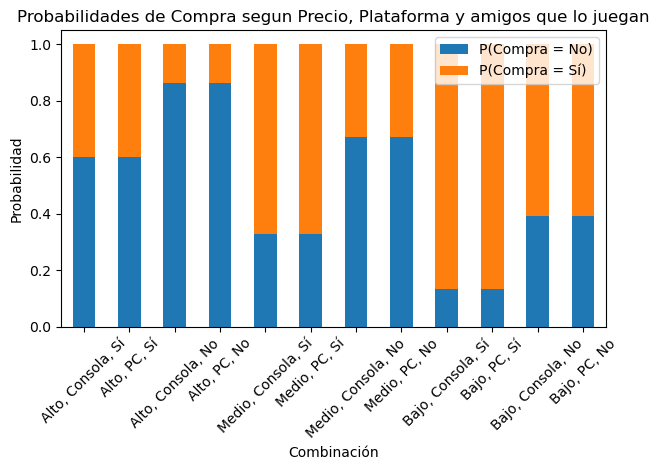

In [23]:
combinations['Etiqueta'] = combinations.apply(lambda row: f"{row['Precio']}, {row['Plataforma']}, {row['Amigos que lo juegan']}", axis=1)

combinations.plot(x='Etiqueta', y=['P(Compra = No)', 'P(Compra = Sí)'], kind='bar', stacked=True)
plt.title('Probabilidades de Compra segun Precio, Plataforma y amigos que lo juegan')
plt.xlabel('Combinación')
plt.ylabel('Probabilidad')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

# Save the plot
plt.savefig('probabilidades_condicionales_compra_naive_bayes.png')